# Gabungan Sobel dan Laplacian
Gunakan kode berikut saja untuk deploy

In [ ]:
from google.colab import drive
drive.mount('/content/drive2')

Mounted at /content/drive2


In [ ]:
import cv2
import os
import numpy as np
from IPython.display import Image, display

def is_blur_laplacian(image_path, laplacian_threshold):
    """
    Mengklasifikasikan gambar sebagai 'Blur' atau 'Valid' berdasarkan varians Laplacian.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return None, None  # Tidak dapat membaca gambar
    variance = cv2.Laplacian(image, cv2.CV_64F).var()
    status = "Blur" if variance < laplacian_threshold else "Valid"
    return status, variance

def is_blur_sobel(image_path, sobel_threshold):
    """
    Mengklasifikasikan gambar sebagai 'Blur' atau 'Valid' berdasarkan varians Sobel.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return None, None  # Tidak dapat membaca gambar

    # Menghitung gradien Sobel pada arah x dan y
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradien horizontal
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradien vertikal

    # Menggabungkan gradien x dan y
    sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Variansi gradien Sobel digunakan untuk menentukan ketajaman
    variance = sobel_magnitude.var()

    # Menentukan status berdasarkan threshold
    status = "Blur" if variance < sobel_threshold else "Valid"
    return status, variance

def process_images_combined(folder_path, laplacian_threshold, sobel_threshold):
    """
    Memproses semua gambar dalam folder, mengklasifikasikannya berdasarkan hasil Laplacian
    dan Sobel, serta mengelompokkan hasilnya ke dalam dua kategori.
    """
    if not os.path.exists(folder_path):
        print(f"Error: Folder {folder_path} tidak ditemukan!")
        return

    valid_images = []
    blur_images = []

    valid_extensions = {'.png', '.jpg', '.jpeg'}
    for root, _, files in os.walk(folder_path):  # Mendukung sub-folder
        for file in files:
            if os.path.splitext(file)[1].lower() in valid_extensions:
                file_path = os.path.join(root, file)

                # Menggunakan metode Laplacian dan Sobel
                laplacian_status, laplacian_var = is_blur_laplacian(file_path, laplacian_threshold)
                sobel_status, sobel_var = is_blur_sobel(file_path, sobel_threshold)

                # Menggabungkan hasil dengan logika "or"
                if laplacian_status == "Valid" or sobel_status == "Valid":
                    valid_images.append((file, laplacian_var, sobel_var))
                else:
                    blur_images.append((file, laplacian_var, sobel_var))

    # Menampilkan hasil pengelompokan
    print("\nGambar Valid:")
    for img, lap_var, sob_var in valid_images:
        print(f"{img}: Laplacian Variance = {lap_var:.2f}, Sobel Variance = {sob_var:.2f}, Status = Valid")

    print("\nGambar Blur:")
    for img, lap_var, sob_var in blur_images:
        print(f"{img}: Laplacian Variance = {lap_var:.2f}, Sobel Variance = {sob_var:.2f}, Status = Blur")

def classify_image(image_path, laplacian_threshold, sobel_threshold):
    """
    Mengklasifikasikan satu gambar berdasarkan hasil Laplacian dan Sobel.
    """
    # Menggunakan metode Laplacian dan Sobel
    laplacian_status, laplacian_var = is_blur_laplacian(image_path, laplacian_threshold)
    sobel_status, sobel_var = is_blur_sobel(image_path, sobel_threshold)

    # Menggabungkan hasil dengan logika "or"
    if laplacian_status == "Valid" or sobel_status == "Valid":
        print(f"Image is Valid.")
        print(f"Laplacian Variance = {laplacian_var:.2f}, Sobel Variance = {sobel_var:.2f}")
    else:
        print(f"Image is Blur.")
        print(f"Laplacian Variance = {laplacian_var:.2f}, Sobel Variance = {sobel_var:.2f}")
        # Menampilkan gambar
    try:
        display(Image(image_path, height=500))
    except Exception as e:
        print(f"Error displaying image: {e}")

In [ ]:
folder_path = '/content/drive2/MyDrive/Capstone_Project/Plan A/Data ORI and SPLIT/Testing Blur 1'
laplacian_threshold = 100  # Ambang batas varians Laplacian
sobel_threshold = 500      # Ambang batas varians Sobel
process_images_combined(folder_path, laplacian_threshold, sobel_threshold)


Gambar Valid:
Valid 120.jpg: Laplacian Variance = 5256.72, Sobel Variance = 67805.91, Status = Valid
Valid 122.jpg: Laplacian Variance = 74.25, Sobel Variance = 1374.18, Status = Valid
Valid 118.jpg: Laplacian Variance = 1164.64, Sobel Variance = 18555.55, Status = Valid
Valid 119.jpg: Laplacian Variance = 28.56, Sobel Variance = 787.97, Status = Valid
Valid 117.jpeg: Laplacian Variance = 349.67, Sobel Variance = 17190.65, Status = Valid
Valid 125.jpg: Laplacian Variance = 175.86, Sobel Variance = 3657.69, Status = Valid
Valid 129.jpeg: Laplacian Variance = 144.35, Sobel Variance = 4585.04, Status = Valid
Valid 126.jpg: Laplacian Variance = 1397.68, Sobel Variance = 22538.43, Status = Valid
Valid 130.jpg: Laplacian Variance = 25.65, Sobel Variance = 1200.52, Status = Valid
Valid 123.jpg: Laplacian Variance = 264.04, Sobel Variance = 5625.95, Status = Valid
Valid 131.jpg: Laplacian Variance = 35.49, Sobel Variance = 1102.07, Status = Valid
Valid 134.jpg: Laplacian Variance = 1033.56, S

Image is Blur.
Laplacian Variance = 2.51, Sobel Variance = 215.98


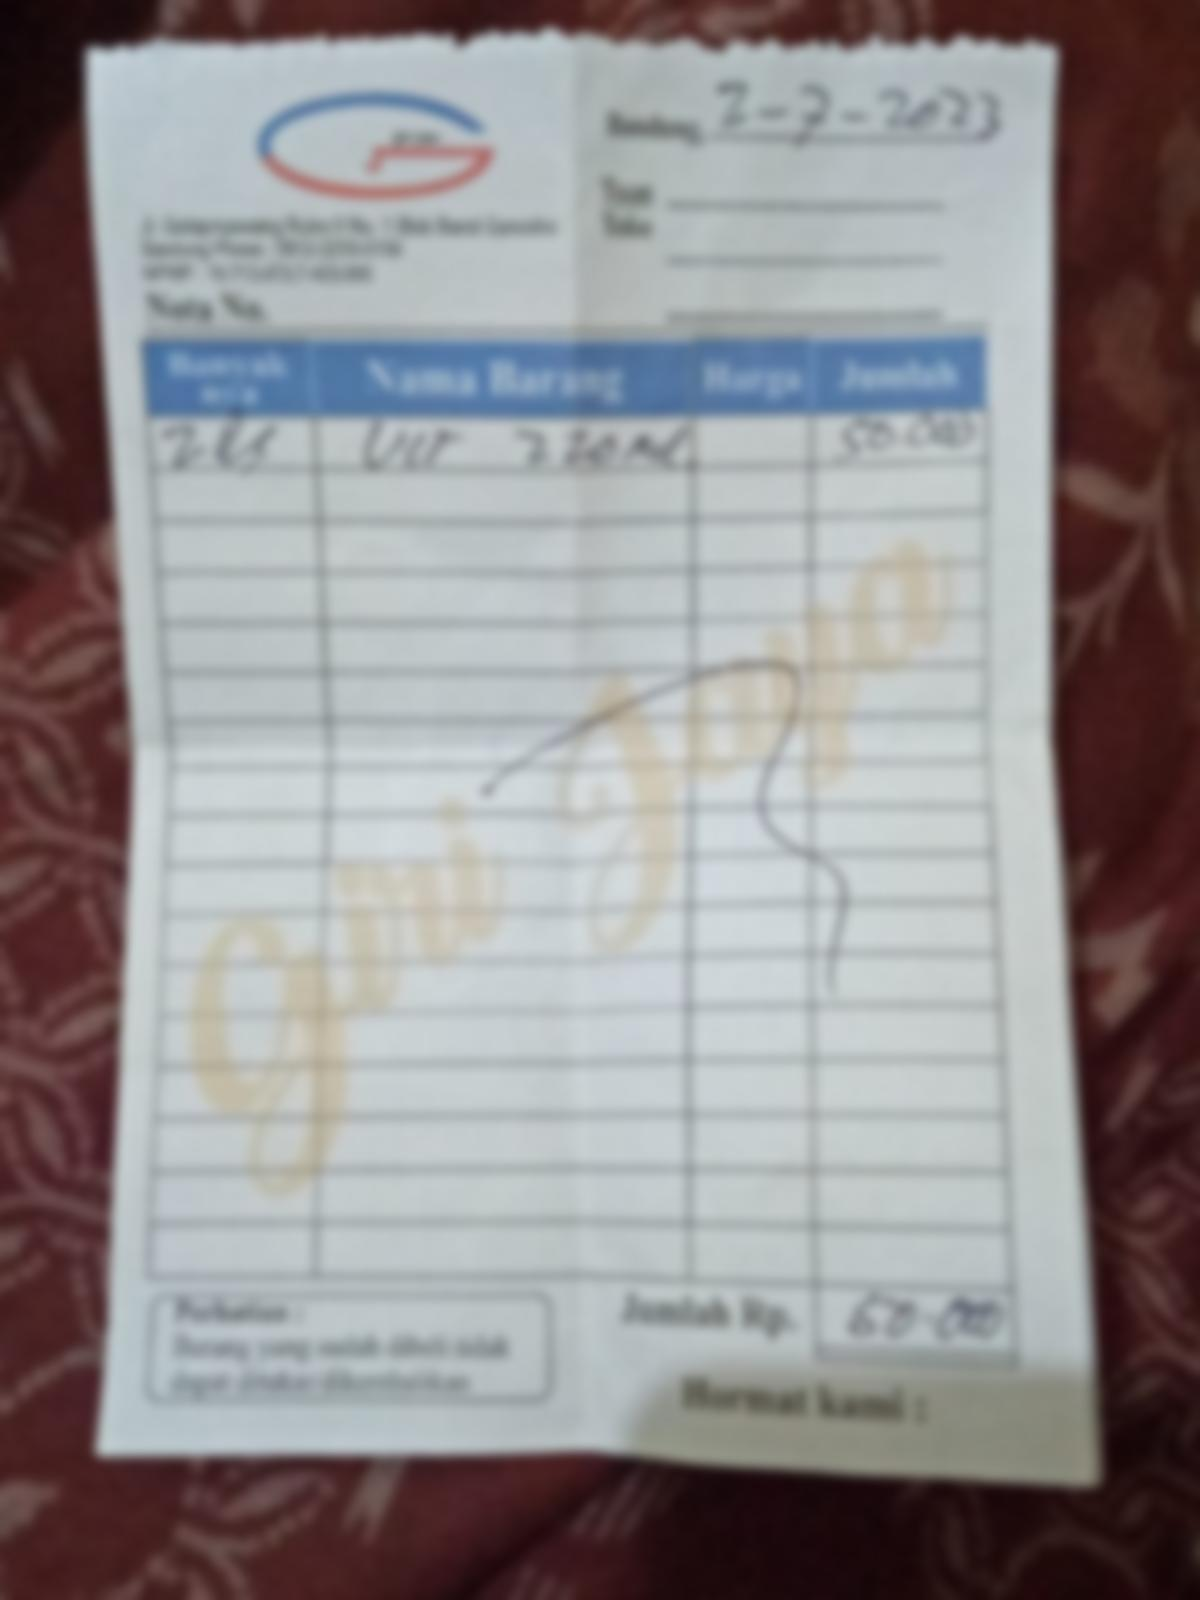

In [ ]:
image_path = '/content/drive2/MyDrive/Capstone_Project/Plan A/Data ORI and SPLIT/Testing Blur 1/blurred_Valid 5.jpg'  # Ganti dengan path gambar Anda
laplacian_threshold = 100  # Threshold untuk Laplacian
sobel_threshold = 500     # Threshold untuk Sobel

classify_image(image_path, laplacian_threshold, sobel_threshold)